# Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

## Objectius
    Preprocesament de les dades.
    Transformació i creació de Dummys i enumeracions.
    Divisió de les dades en Train i Test.
    Estudi de les dades utilitzant eines anteriors (gràfiques, hipòtesis…).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu. També adjunt trobaràs una descripció de les diferents variables del dataset.

## Info sobre el conjunt de dades

Relevant Information:

   Concerns housing values in suburbs of Boston.

Number of Instances: 506

Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per USD 10,000
    11. PTRATIO  pupil-teacher ratio by town 
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in USD 1000's

Missing Attribute Values:  None.

In [3]:
df = pd.read_csv('housing data.csv')
df

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
# Afegir nom columnes segons descripció en .txt
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD','TAX','PRATIO', 'BTH', 'LSTAT', 'MEDV']

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,BTH,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,BTH,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    505 non-null    float64
 1   ZN      505 non-null    float64
 2   INDUS   505 non-null    float64
 3   CHAS    505 non-null    int64  
 4   NOX     505 non-null    float64
 5   RM      505 non-null    float64
 6   AGE     505 non-null    float64
 7   DIS     505 non-null    float64
 8   RAD     505 non-null    int64  
 9   TAX     505 non-null    float64
 10  PRATIO  505 non-null    float64
 11  BTH     505 non-null    float64
 12  LSTAT   505 non-null    float64
 13  MEDV    505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [8]:
df['ZN'].unique


<bound method Series.unique of 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
500    0.0
501    0.0
502    0.0
503    0.0
504    0.0
Name: ZN, Length: 505, dtype: float64>

In [9]:
# Comprovar valors nuls
df.isnull().sum()

CRIM      0
ZN        0
INDUS     0
CHAS      0
NOX       0
RM        0
AGE       0
DIS       0
RAD       0
TAX       0
PRATIO    0
BTH       0
LSTAT     0
MEDV      0
dtype: int64

<Axes: >

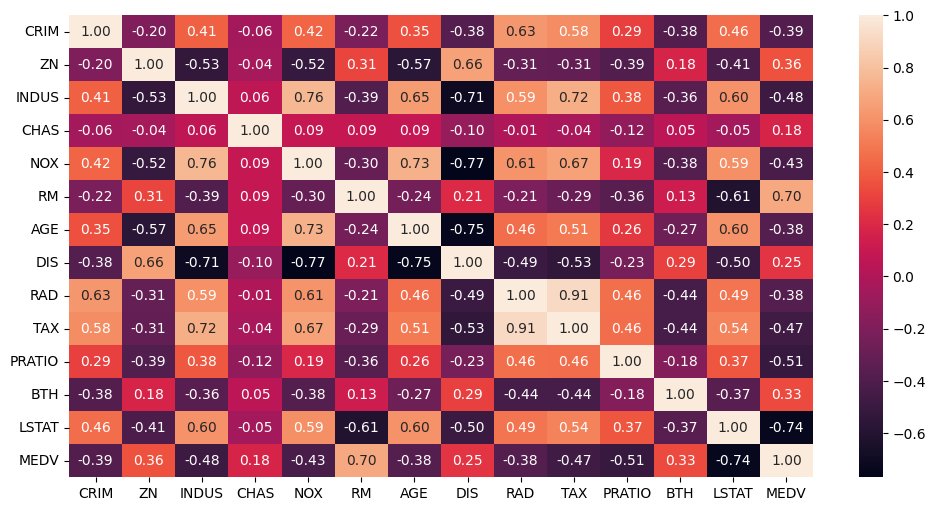

In [10]:
# Explorem les dades per saber si hi ha alguna correlació
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")


La correlació més forta és entre RAD i TAX (0.91):<br>
RAD       index of accessibility to radial highways<br>
TAX      full-value property-tax rate per USD 10,000<br>
La resta de correlacions entre variables són moderades

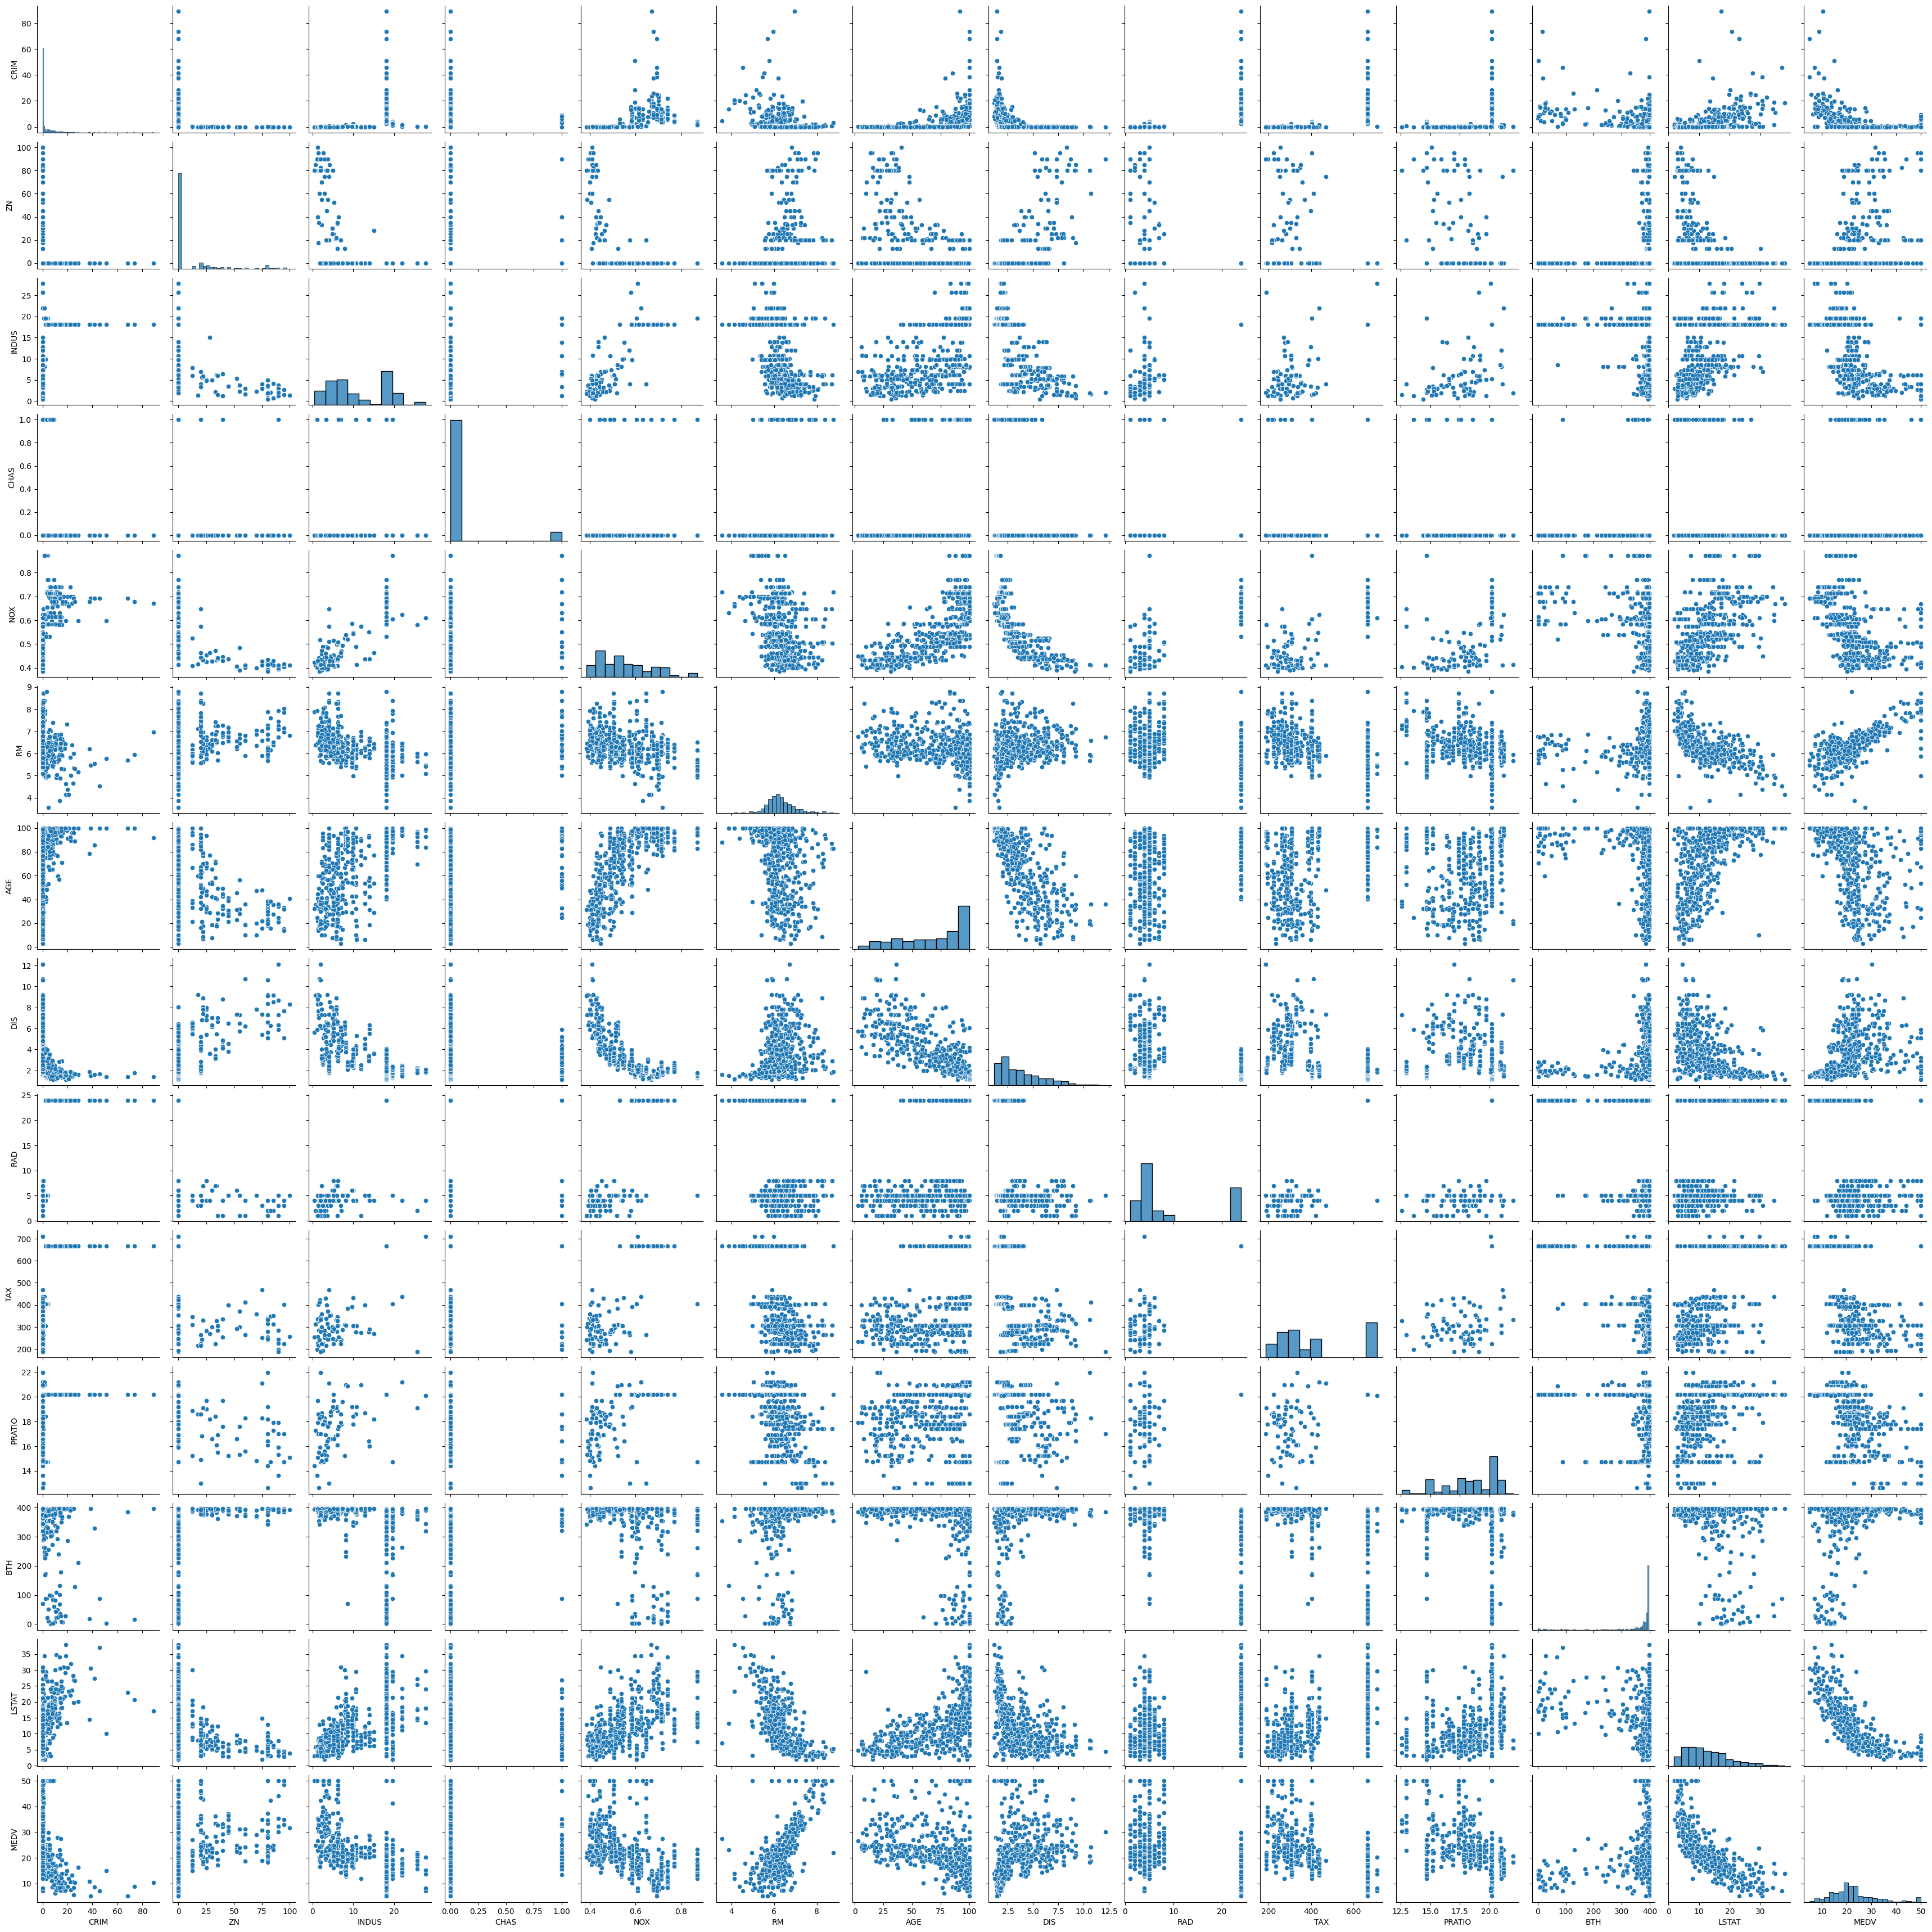

In [11]:
# Visualitzar amb pairplot les possibles correlacions entre dades
sns.pairplot(df, kind='scatter', diag_kind='auto')
plt.show()

Aquí veiem les correlacions en pairplot, i podem constatar també de manera visual la correlació entre les variables. Arribem a ma cateixa conclusió que amb el heatmap: la correlació entre les variables és, en general, moderada.

<Axes: >

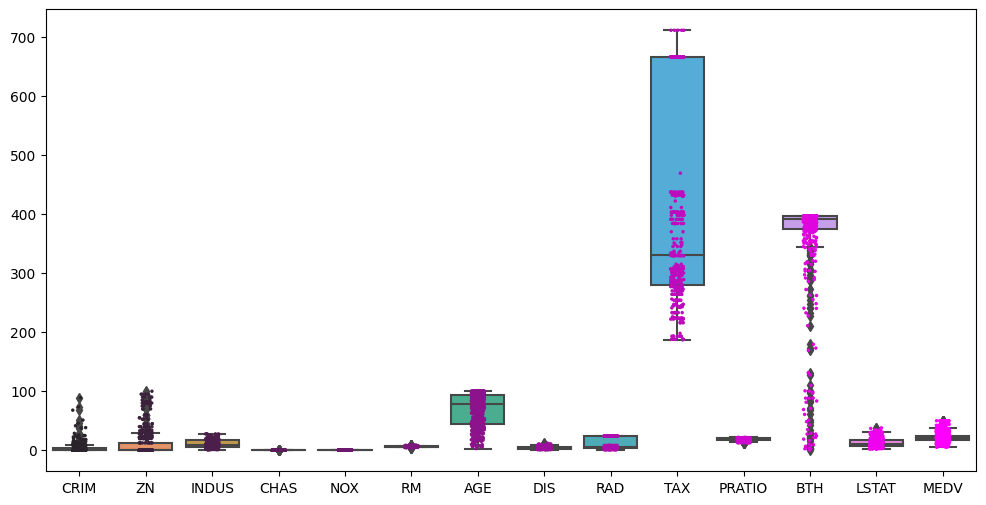

In [12]:
# Configuració de canvas
plt.figure(figsize=(12, 6))

# Boxplot per explorar dades
sns.boxplot(data=df)
sns.stripplot(data=df, color="magenta", jitter=0.1, size=2.5)

En aquesta visualització veiem com existeixen outliers en la variable BTH (Black per Thousand)

Donat el dataset, el que s'intentarà preveure és la variable MED<br>
MED: Median value of owner-occupied homes in USD 1000's<br>


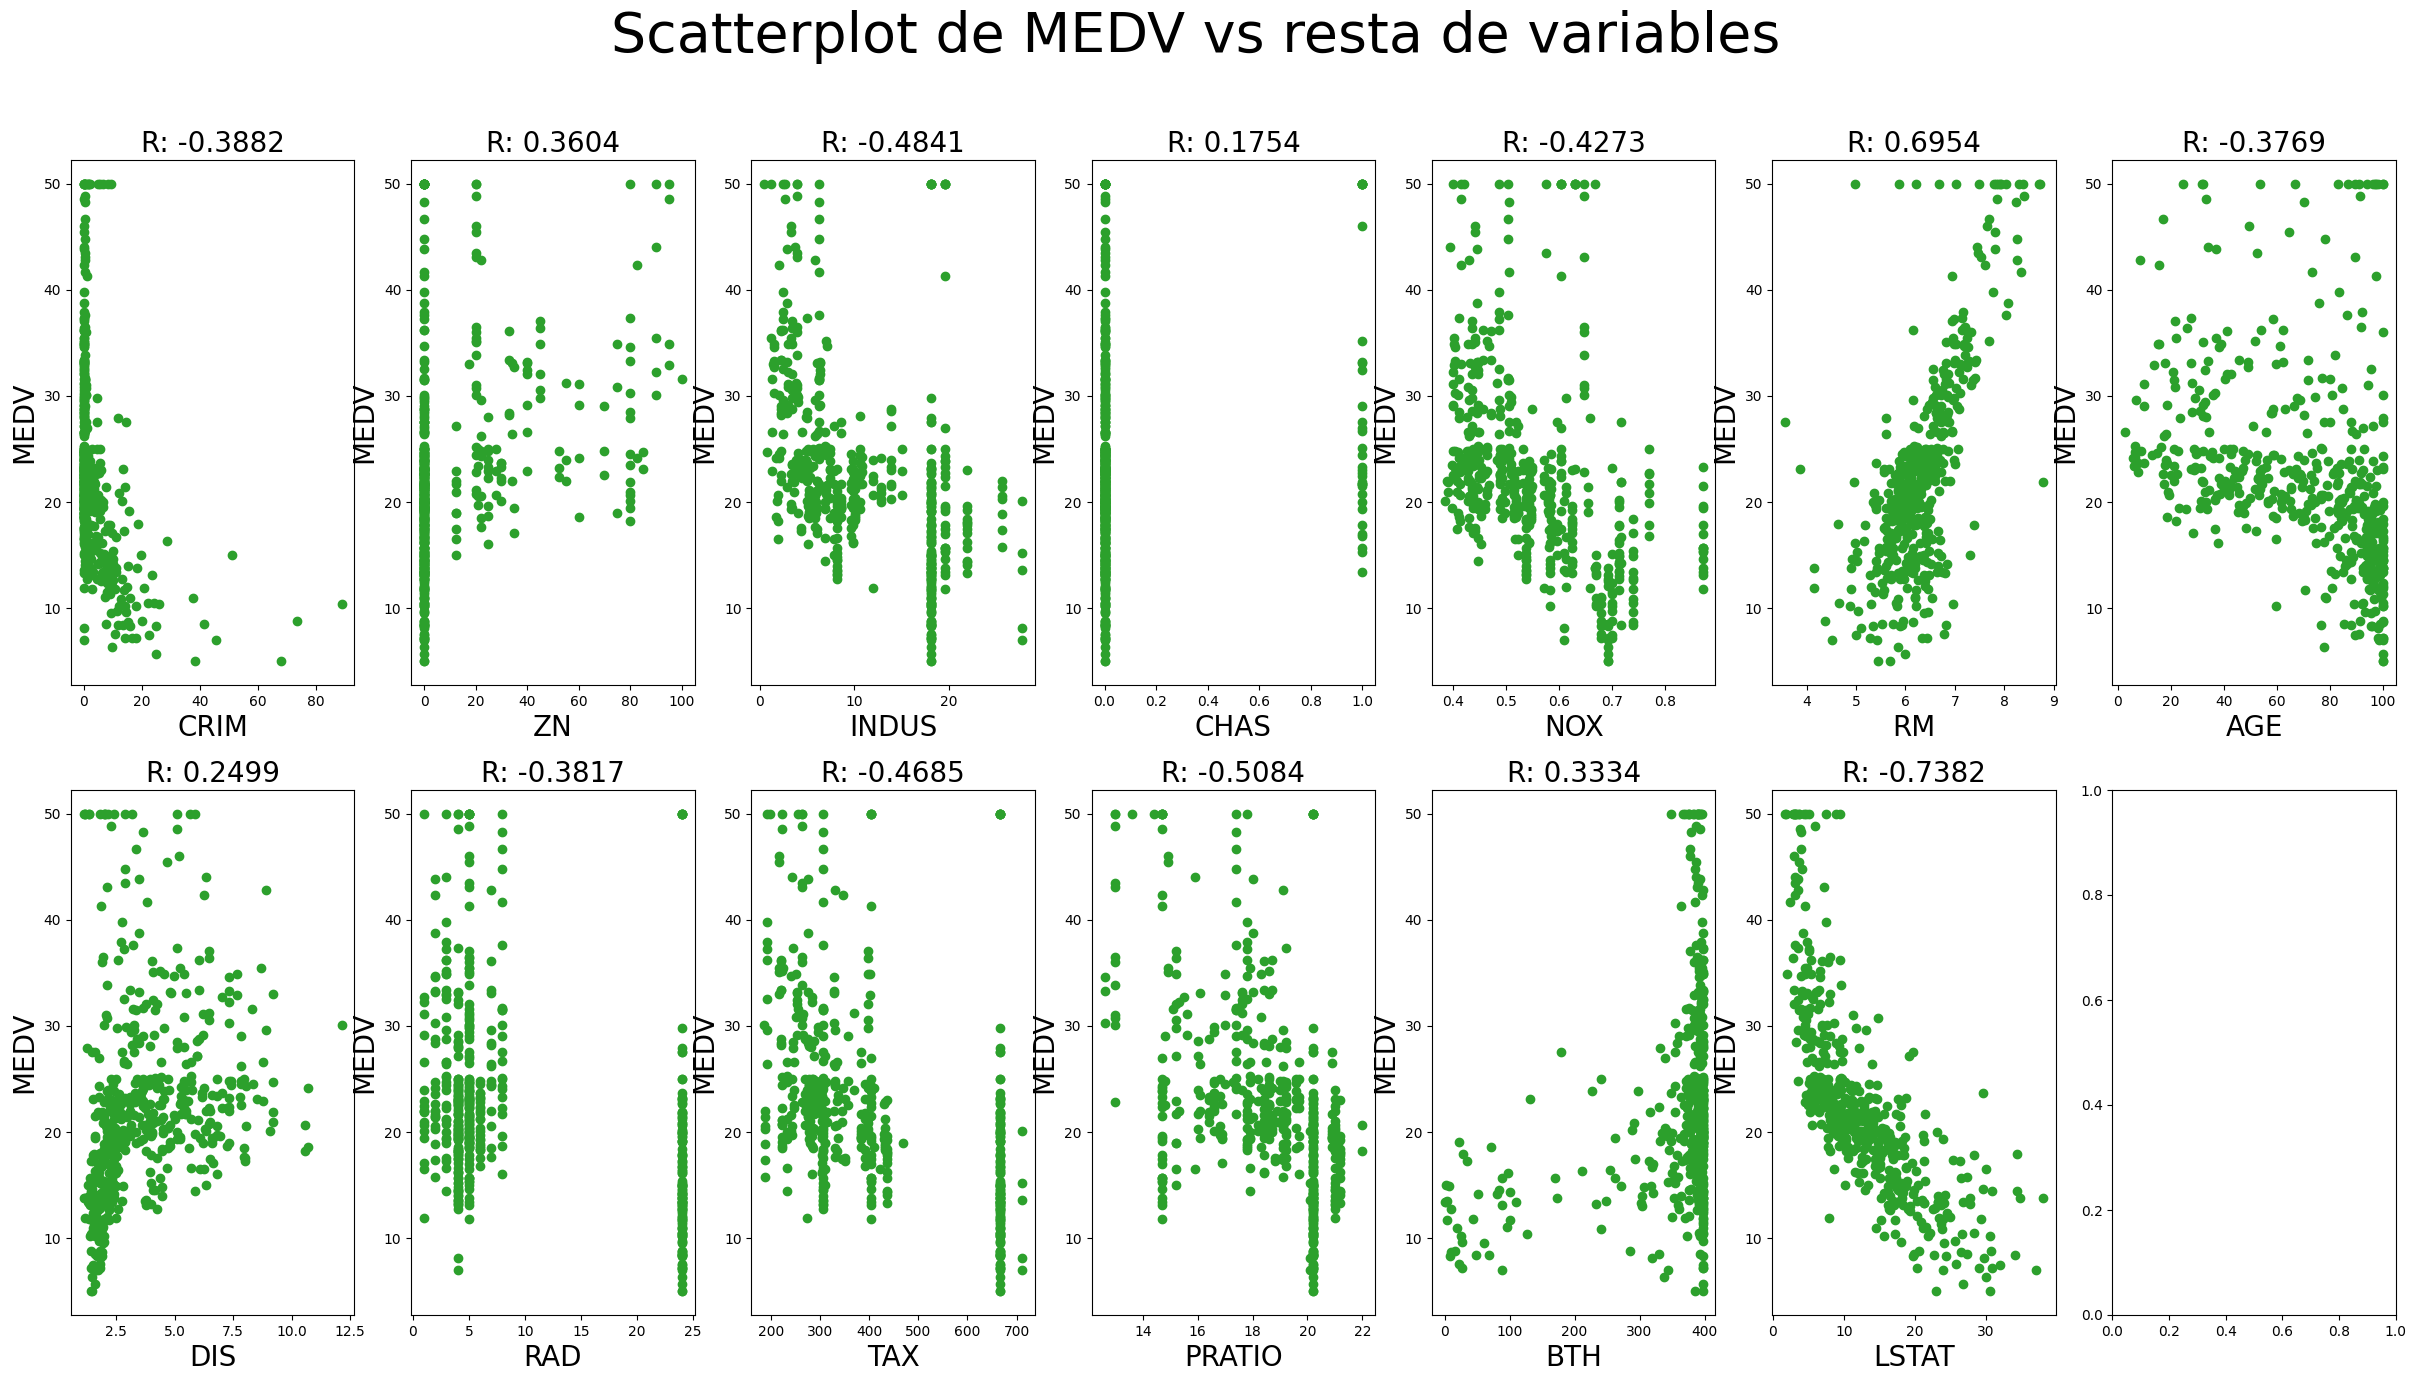

In [13]:
# Crear figures
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(30,15))

# Creació de variable amb les diferents columnes
cols_to_plot = df.columns[:-1] 

# iteració sobre les columnes
for ax, col in zip(axes.flatten(), cols_to_plot):

    # scatter plot
    ax.scatter(df[col], df.MEDV, color='tab:green')

    # etiquetes
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel('MEDV', fontsize=20)
    ax.set_title(f'R: {df[["MEDV", col]].corr().iloc[0, 1]:.4f}', fontsize=20)

fig.suptitle('Scatterplot de MEDV vs resta de variables', fontsize=40)

plt.show()

A l'scaterplott s'observa que la relació de MDV amb les varibles amb CHAS i RAD fa columnes perfectes, el que vol dir que CHAD és binaria i RAD conté varis ordinals discrets.
<li>CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
<li>RAD       index of accessibility to radial highways</li>

    
La correlació entre MEDV és més significativa amb RM (correlació positiva) i LSTAT (correlació negativa).
<li>RM        average number of rooms per dwelling</li>
<li>LSTAT    % lower status of the population</li>



### Train and test
Es divideix el dataset en un 20% per train i un 80% per test.

In [15]:
# Importació del mòdul train_test_split de sklearn
from sklearn.model_selection import train_test_split

In [16]:
# Train and test 20%-80%, amb random_state per reproduir sempre el mateix resultat

train, test = train_test_split(df, test_size=0.2, random_state = 3)
print("Mostra per TRAIN (80%): ", len(train), "registres")
print("Mostra per TEST  (20%): ", len(test), "registres")

Mostra per TRAIN (80%):  404 registres
Mostra per TEST  (20%):  101 registres


### Exploració descriptiva de les dades

In [17]:
train.shape

(404, 14)

In [18]:
test.shape

(101, 14)

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 224 to 462
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    101 non-null    float64
 1   ZN      101 non-null    float64
 2   INDUS   101 non-null    float64
 3   CHAS    101 non-null    int64  
 4   NOX     101 non-null    float64
 5   RM      101 non-null    float64
 6   AGE     101 non-null    float64
 7   DIS     101 non-null    float64
 8   RAD     101 non-null    int64  
 9   TAX     101 non-null    float64
 10  PRATIO  101 non-null    float64
 11  BTH     101 non-null    float64
 12  LSTAT   101 non-null    float64
 13  MEDV    101 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 11.8 KB


In [21]:
test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,BTH,LSTAT,MEDV
224,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
137,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437.0,21.2,392.04,21.32,13.3
382,7.99248,0.0,18.10,0,0.700,5.520,100.0,1.5331,24,666.0,20.2,396.90,24.56,12.3
302,0.10000,34.0,6.09,0,0.433,6.982,17.7,5.4917,7,329.0,16.1,390.43,4.86,33.1
254,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315.0,16.4,395.18,9.25,20.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.13642,0.0,10.59,0,0.489,5.891,22.3,3.9454,4,277.0,18.6,396.90,10.87,22.6
433,13.91340,0.0,18.10,0,0.713,6.208,95.0,2.2222,24,666.0,20.2,100.63,15.17,11.7
457,7.75223,0.0,18.10,0,0.713,6.301,83.7,2.7831,24,666.0,20.2,272.21,16.23,14.9
305,0.07503,33.0,2.18,0,0.472,7.420,71.9,3.0992,7,222.0,18.4,396.90,6.47,33.4


In [22]:
# Comparem amb train
train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,BTH,LSTAT,MEDV
489,0.20746,0.0,27.74,0,0.6090,5.093,98.0,1.8226,4,711.0,20.1,318.43,29.68,8.1
404,67.92080,0.0,18.10,0,0.6930,5.683,100.0,1.4254,24,666.0,20.2,384.97,22.98,5.0
359,4.54192,0.0,18.10,0,0.7700,6.398,88.0,2.5182,24,666.0,20.2,374.56,7.79,25.0
280,0.03705,20.0,3.33,0,0.4429,6.968,37.2,5.2447,5,216.0,14.9,392.23,4.59,35.4
446,9.92485,0.0,18.10,0,0.7400,6.251,96.6,2.1980,24,666.0,20.2,388.52,16.44,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,9.72418,0.0,18.10,0,0.7400,6.406,97.2,2.0651,24,666.0,20.2,385.96,19.52,17.1
131,0.59005,0.0,21.89,0,0.6240,6.372,97.9,2.3274,4,437.0,21.2,385.76,11.12,23.0
249,0.14030,22.0,5.86,0,0.4310,6.487,13.0,7.3967,7,330.0,19.1,396.28,5.90,24.4
152,2.14918,0.0,19.58,0,0.8710,5.709,98.5,1.6232,5,403.0,14.7,261.95,15.79,19.4


In [24]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.560507,8.313736,0.00906,0.082973,0.266005,3.694070,88.9762
ZN,404.0,11.316832,23.553405,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,404.0,11.067500,6.800622,0.74000,5.175000,9.690000,18.100000,27.7400
CHAS,404.0,0.061881,0.241238,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,404.0,0.555230,0.116373,0.38500,0.449000,0.538000,0.624000,0.8710
RM,404.0,6.283886,0.694049,3.56100,5.888000,6.211000,6.630000,8.7800
AGE,404.0,68.758663,27.639572,6.20000,45.800000,76.500000,94.100000,100.0000
DIS,404.0,3.786069,2.095817,1.13700,2.097050,3.239250,5.117025,12.1265
RAD,404.0,9.707921,8.754940,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,404.0,408.029703,170.739623,187.00000,277.000000,330.000000,666.000000,711.0000


In [25]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,101.0,3.861306,9.740759,0.01301,0.07886,0.2498,2.44668,73.5341
ZN,101.0,11.485149,22.599165,0.00000,0.00000,0.0000,20.00000,82.5000
INDUS,101.0,11.501287,7.096581,0.46000,5.32000,10.0100,18.10000,27.7400
CHAS,101.0,0.099010,0.300165,0.00000,0.00000,0.0000,0.00000,1.0000
NOX,101.0,0.552721,0.115001,0.39200,0.44800,0.5380,0.62400,0.8710
RM,101.0,6.284752,0.742244,3.86300,5.87600,6.1670,6.53800,8.7250
AGE,101.0,67.873267,30.363797,2.90000,36.60000,83.3000,93.90000,100.0000
DIS,101.0,3.828016,2.165158,1.12960,2.11070,3.0992,5.40070,10.5857
RAD,101.0,9.000000,8.534635,1.00000,4.00000,5.0000,8.00000,24.0000
TAX,101.0,410.178218,160.721647,188.00000,284.00000,345.0000,437.00000,711.0000


Les mitjanes dels dos datasets són similars, i per tant sembla que la distribució entre train i test és correcta.
Igualment, la desviació estàndard és similar

# Exercici 2.
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

Per triar el procés de transformació, comprovem la distribució de les variables. El test de Shapiro-Wilk ens donarà aquesta informació variable per variable

### Prova de Shapiro-Wilk (dataset TRAIN)
Realitzem aquesta prova per saber si la mostra de dades té una distribució gaussiana.

#### Suposicions

Les observacions de cada mostra són independents i distribuïdes de manera idèntica (iid).
#### Interpretació

#### H0: la mostra té una distribució gaussiana.

#### H1: la mostra no té una distribució gaussiana.


In [33]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro

for variable in train:
    stat, p = shapiro(train[variable])
    
    print("*"*50)
    print(variable, "| Tipus de dada:", train[variable].dtypes)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('La distribució probablement ÉS gaussiana')
    else:
        print('La distribució probablement NO és gaussiana')
    print("*"*50,"\n")

**************************************************
CRIM | Tipus de dada: float64
stat=0.456, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
ZN | Tipus de dada: float64
stat=0.549, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
INDUS | Tipus de dada: float64
stat=0.896, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
CHAS | Tipus de dada: int64
stat=0.256, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
NOX | Tipus de dada: float64
stat=0.935, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************

Cap variable té distribució gaussiana. A continuació, buscarem outliers en les dades

<Axes: >

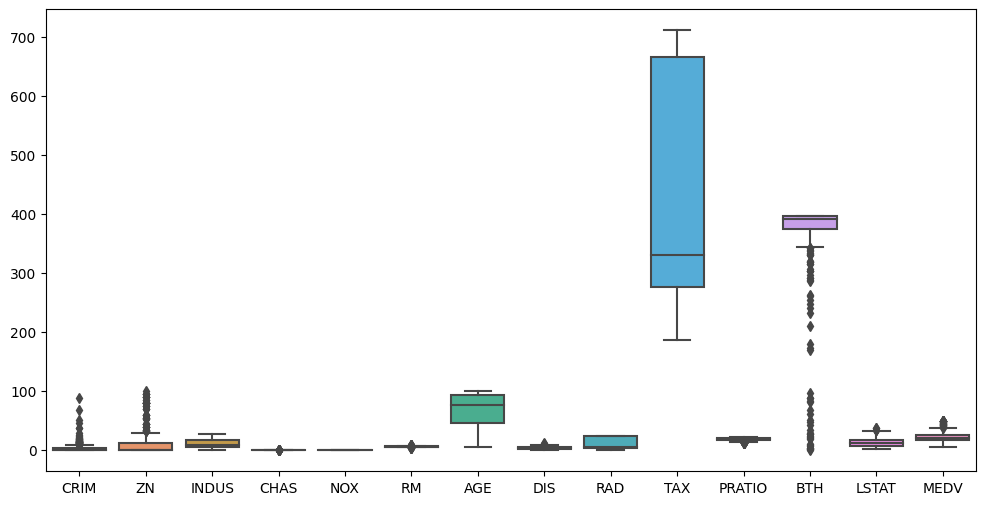

In [31]:
# Configuració de canvas
plt.figure(figsize=(12, 6))

# Boxplot per visualitzar ouliers
sns.boxplot(data=train)


Repetim els mateixos passos amb al dataset TEST

### Prova de Shapiro-Wilk (dataset TEST)
Realitzem aquesta prova per saber si la mostra de dades té una distribució gaussiana.

#### Suposicions

Les observacions de cada mostra són independents i distribuïdes de manera idèntica (iid).
#### Interpretació

#### H0: la mostra té una distribució gaussiana.

#### H1: la mostra no té una distribució gaussiana.


In [35]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro

for variable in test:
    stat, p = shapiro(test[variable])
    
    print("*"*50)
    print(variable, "| Tipus de dada:", test[variable].dtypes)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('La distribució probablement ÉS gaussiana')
    else:
        print('La distribució probablement NO és gaussiana')
    print("*"*50,"\n")

**************************************************
CRIM | Tipus de dada: float64
stat=0.437, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
ZN | Tipus de dada: float64
stat=0.571, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
INDUS | Tipus de dada: float64
stat=0.908, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
CHAS | Tipus de dada: int64
stat=0.340, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
NOX | Tipus de dada: float64
stat=0.932, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************

<Axes: >

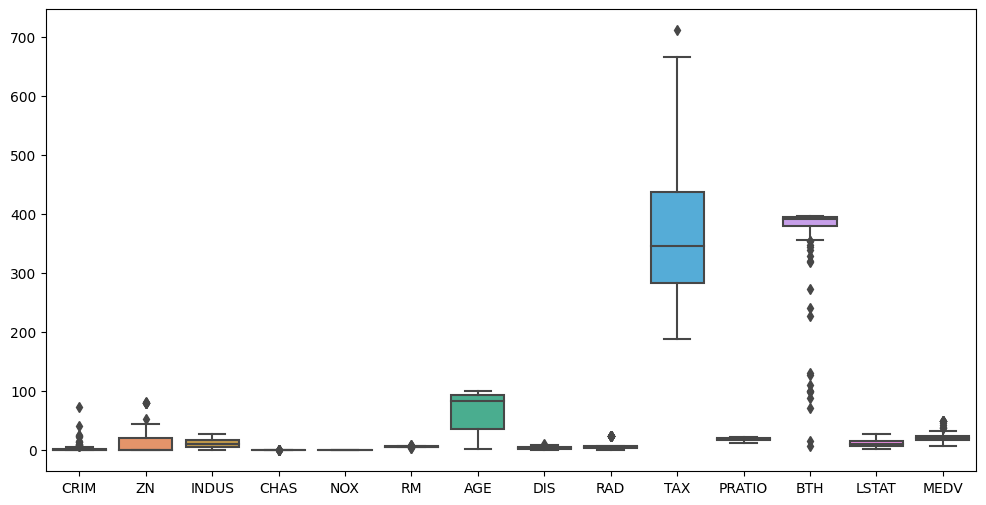

In [37]:
# Configuració de canvas
plt.figure(figsize=(12, 6))

# Boxplot per visualitzar ouliers
sns.boxplot(data=test)


Text(0.5, 1.0, 'Test')

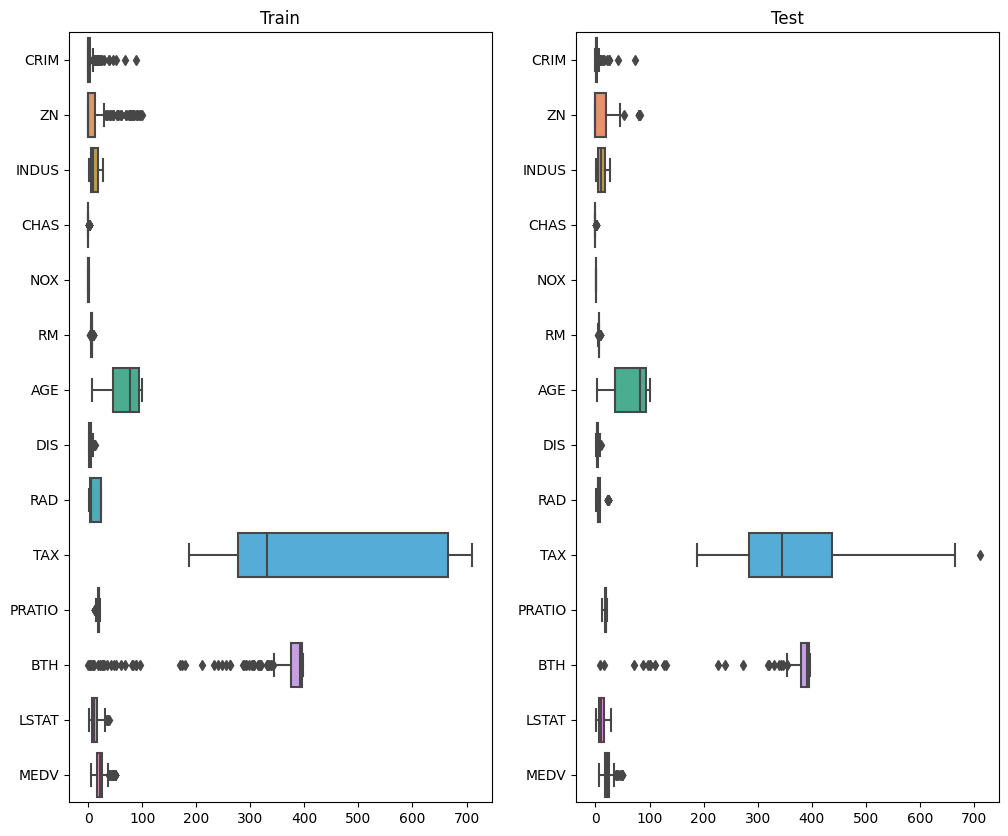

In [40]:
# Comparació dels dos datasets en paral·lel
fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(1, 2, 1)
sns.boxplot(train, orient='h', ax=ax1)
plt.title('Train')

ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(test, orient='h', ax=ax2)
plt.title('Test')

## PREPROCESSAMENT

El dataset conté outliers, i per tant aplicarem el preprocessat amb, taxán, RobustScaler!

El RobustScaler és un mètode de reescalat que es basa en la mediana i l'interval interquartil (IQR), i no en la mitjana i la desviació estàndard, com altres mètodes. Els outliers poden fer que la mitjana i la desviació estàndard siguin valors no representatius de la distribució real de les dades.

Amb el RobustScaler els valors atípics tenen menys influència en la transformació, la qual cosa ajuda a preservar millor l'estructura.

In [68]:
# Còpia de seguretat
df_preprocessing = df.copy()

In [69]:
from sklearn import preprocessing

# Crear datafram amb les variables mab outliers
df_outliers = ['CRIM', 'ZN', 'RM', 'DIS', 'RAD','PRATIO', 'BTH', 'LSTAT']
rob_scal = preprocessing.RobustScaler().fit(df_preprocessing[df_outliers])
df_preprocessing[df_outliers] = rob_esc.transform(df_preprocessing[df_outliers])

In [70]:
# Visualitzar el dataset
df_preprocessing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,BTH,LSTAT,MEDV
0,-0.064471,0.0,7.07,0,0.469,0.287838,78.9,0.568110,-0.15,242.0,-0.464286,0.261973,-0.225126,21.6
1,-0.064477,0.0,7.07,0,0.469,1.320270,61.1,0.568110,-0.15,242.0,-0.464286,0.067050,-0.738693,34.7
2,-0.063064,0.0,2.18,0,0.458,1.067568,45.8,0.920017,-0.10,222.0,-0.142857,0.153257,-0.848241,33.4
3,-0.052864,0.0,2.18,0,0.458,1.268919,54.2,0.920017,-0.10,222.0,-0.142857,0.261973,-0.608040,36.2
4,-0.063765,0.0,2.18,0,0.458,0.300000,58.7,0.920017,-0.10,222.0,-0.142857,0.128831,-0.620101,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-0.054649,0.0,11.93,0,0.573,0.520270,69.1,-0.231563,-0.20,273.0,0.678571,0.026820,-0.171859,22.4
501,-0.059477,0.0,11.93,0,0.573,-0.118919,76.7,-0.292972,-0.20,273.0,0.678571,0.261973,-0.231156,20.6
502,-0.055169,0.0,11.93,0,0.573,1.037838,91.0,-0.331534,-0.20,273.0,0.678571,0.261973,-0.576884,23.9
503,-0.041591,0.0,11.93,0,0.573,0.791892,89.3,-0.260388,-0.20,273.0,0.678571,0.096743,-0.492462,22.0


Per normalitzar els valors de les variables sense outliers, apliquem la transformació MinMax

In [80]:
# MinMax Scaler
df_no_outliers = ['INDUS', 'NOX', 'AGE', 'TAX']

MinMax = preprocessing.MinMaxScaler().fit(df_preprocessing[df_no_outliers])
df_preprocessing[df_no_outliers] = MinMax.transform(df_preprocessing[df_no_outliers])


In [72]:
# Visualitzar el dataset
df_preprocessing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,BTH,LSTAT,MEDV
0,-0.064471,0.0,0.242302,0,0.172840,0.287838,0.782698,0.568110,-0.15,0.104962,-0.464286,0.261973,-0.225126,21.6
1,-0.064477,0.0,0.242302,0,0.172840,1.320270,0.599382,0.568110,-0.15,0.104962,-0.464286,0.067050,-0.738693,34.7
2,-0.063064,0.0,0.063050,0,0.150206,1.067568,0.441813,0.920017,-0.10,0.066794,-0.142857,0.153257,-0.848241,33.4
3,-0.052864,0.0,0.063050,0,0.150206,1.268919,0.528321,0.920017,-0.10,0.066794,-0.142857,0.261973,-0.608040,36.2
4,-0.063765,0.0,0.063050,0,0.150206,0.300000,0.574665,0.920017,-0.10,0.066794,-0.142857,0.128831,-0.620101,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-0.054649,0.0,0.420455,0,0.386831,0.520270,0.681771,-0.231563,-0.20,0.164122,0.678571,0.026820,-0.171859,22.4
501,-0.059477,0.0,0.420455,0,0.386831,-0.118919,0.760041,-0.292972,-0.20,0.164122,0.678571,0.261973,-0.231156,20.6
502,-0.055169,0.0,0.420455,0,0.386831,1.037838,0.907312,-0.331534,-0.20,0.164122,0.678571,0.261973,-0.576884,23.9
503,-0.041591,0.0,0.420455,0,0.386831,0.791892,0.889804,-0.260388,-0.20,0.164122,0.678571,0.096743,-0.492462,22.0


# Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [74]:
df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
CRIM,505.0,3.621,8.609,0.009,0.082,0.259,3.678,88.976
ZN,505.0,11.350,23.344,0.000,0.000,0.000,12.500,100.000
INDUS,505.0,11.154,6.856,0.460,5.190,9.690,18.100,27.740
CHAS,505.0,0.069,0.254,0.000,0.000,0.000,0.000,1.000
NOX,505.0,0.555,0.116,0.385,0.449,0.538,0.624,0.871
RM,505.0,6.284,0.703,3.561,5.885,6.208,6.625,8.780
AGE,505.0,68.582,28.176,2.900,45.000,77.700,94.100,100.000
DIS,505.0,3.794,2.108,1.130,2.100,3.199,5.212,12.126
RAD,505.0,9.566,8.708,1.000,4.000,5.000,24.000,24.000
TAX,505.0,408.459,168.630,187.000,279.000,330.000,666.000,711.000


In [75]:
df_preprocessing.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
CRIM,505.0,0.935,2.394,-0.070,-0.049,0.000,0.951,24.671
ZN,505.0,0.908,1.867,0.000,0.000,0.000,1.000,8.000
INDUS,505.0,0.392,0.251,0.000,0.173,0.338,0.647,1.000
CHAS,505.0,0.069,0.254,0.000,0.000,0.000,0.000,1.000
NOX,505.0,0.349,0.239,0.000,0.132,0.315,0.492,1.000
RM,505.0,0.103,0.950,-3.577,-0.436,0.000,0.564,3.476
AGE,505.0,0.676,0.290,0.000,0.434,0.770,0.939,1.000
DIS,505.0,0.191,0.677,-0.665,-0.353,0.000,0.647,2.869
RAD,505.0,0.228,0.435,-0.200,-0.050,0.000,0.950,0.950
TAX,505.0,0.423,0.322,0.000,0.176,0.273,0.914,1.000


Aquí veiem com les columnes estan estandaritzades.

A continuació, visualitzarem amb iteració cada columnda del dataset original i de preprocessat

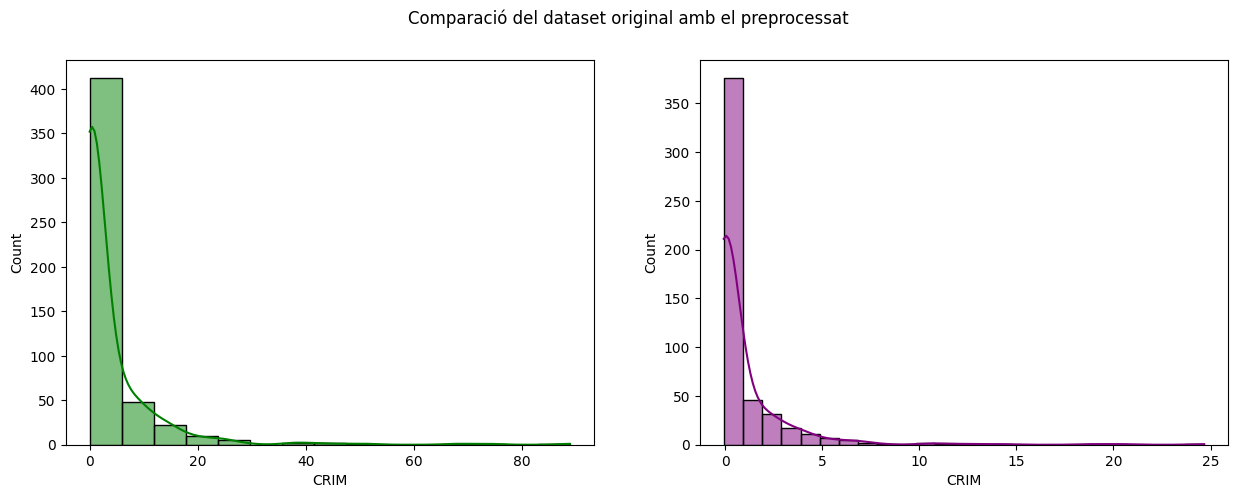

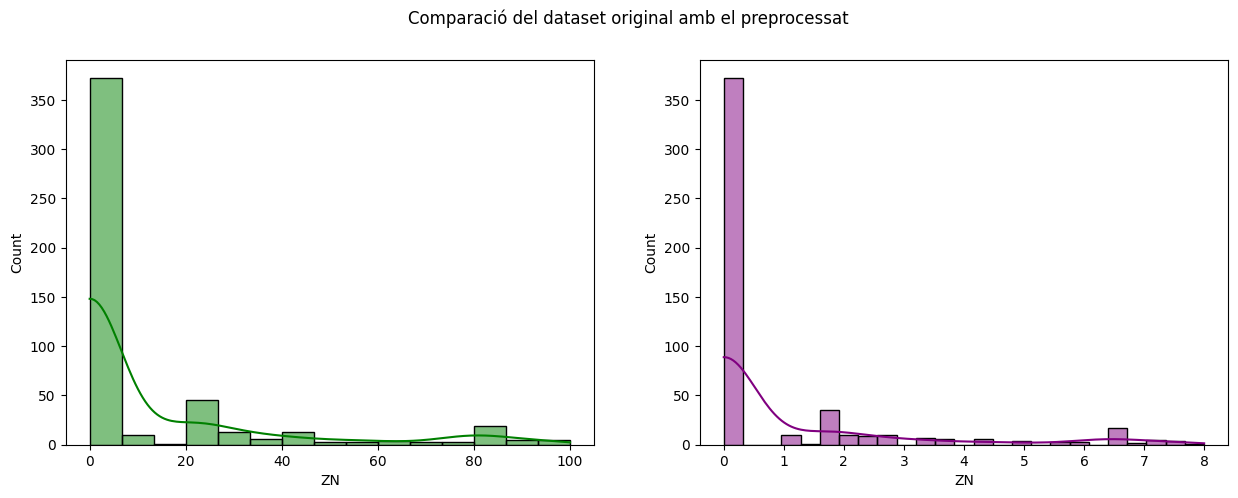

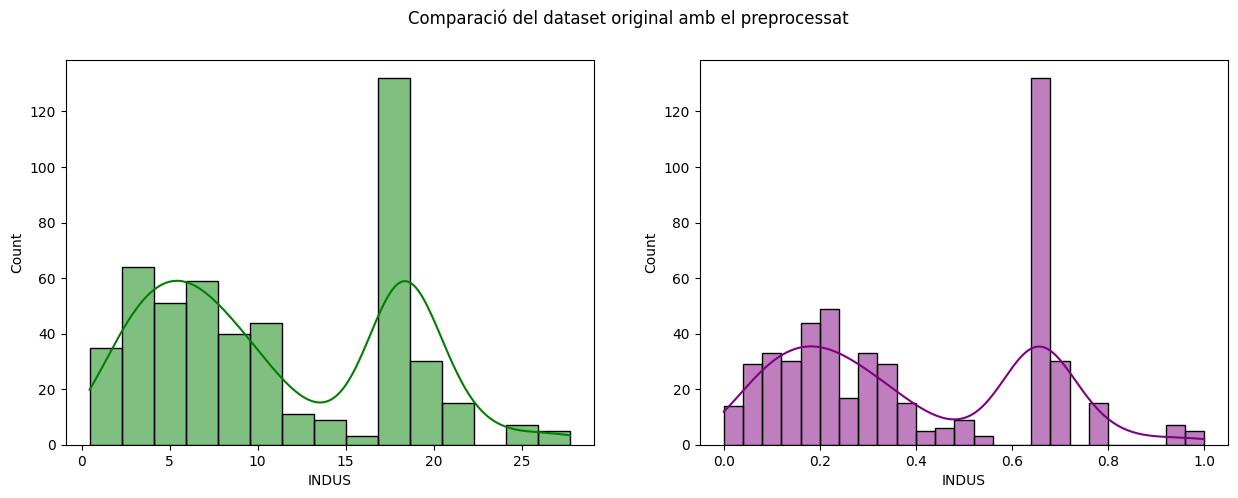

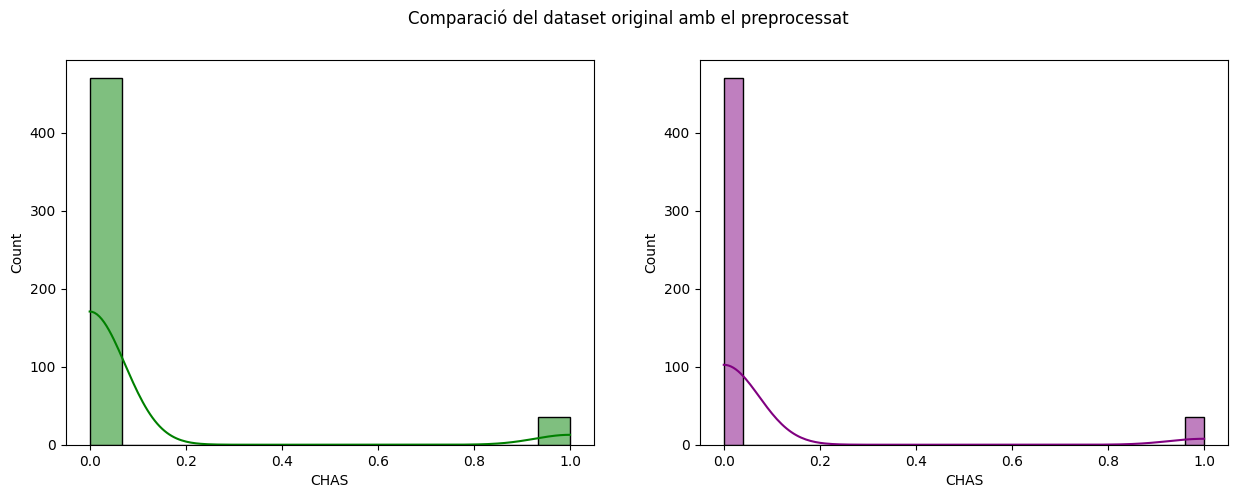

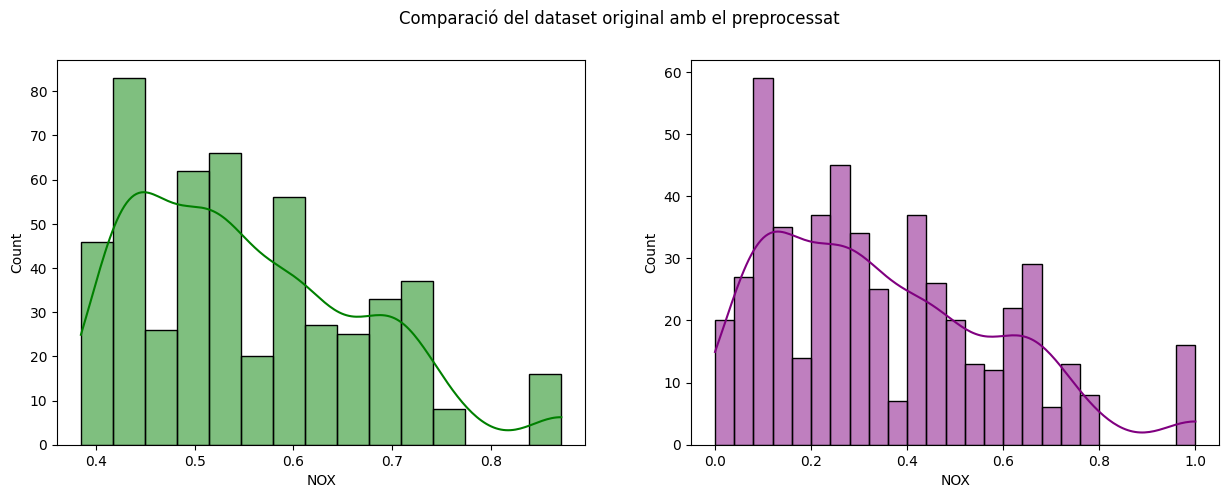

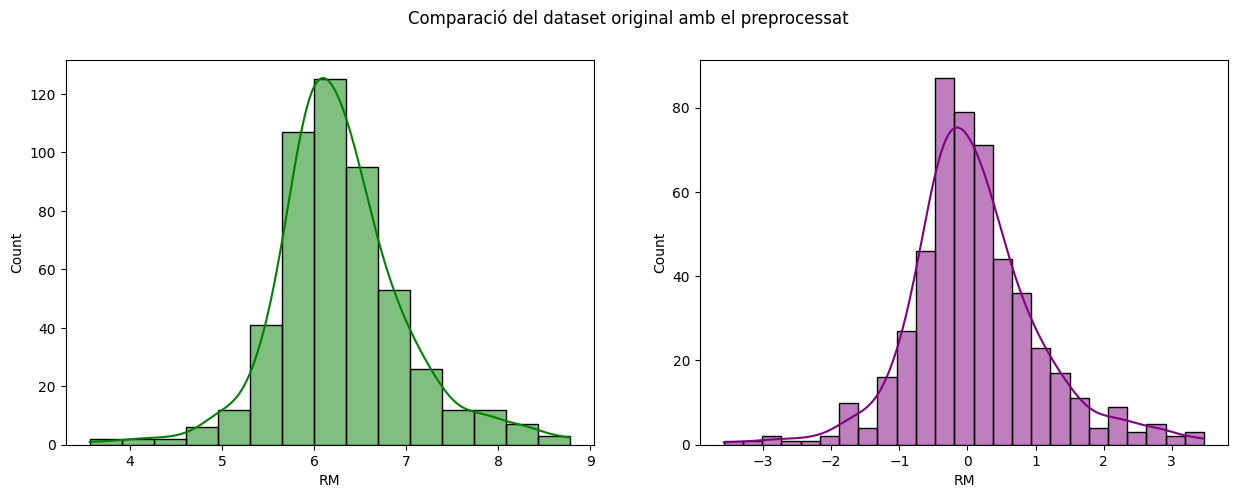

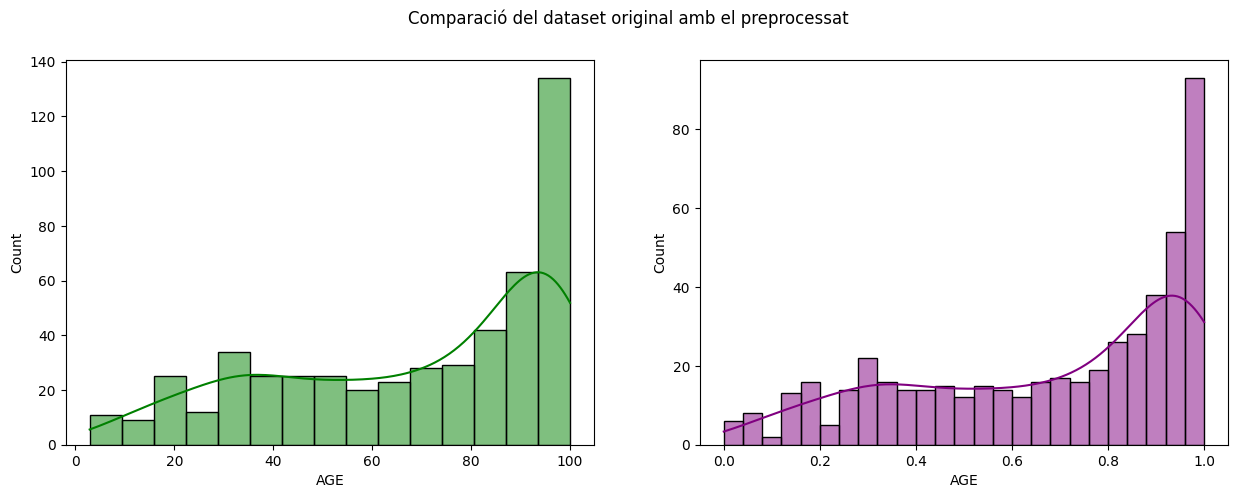

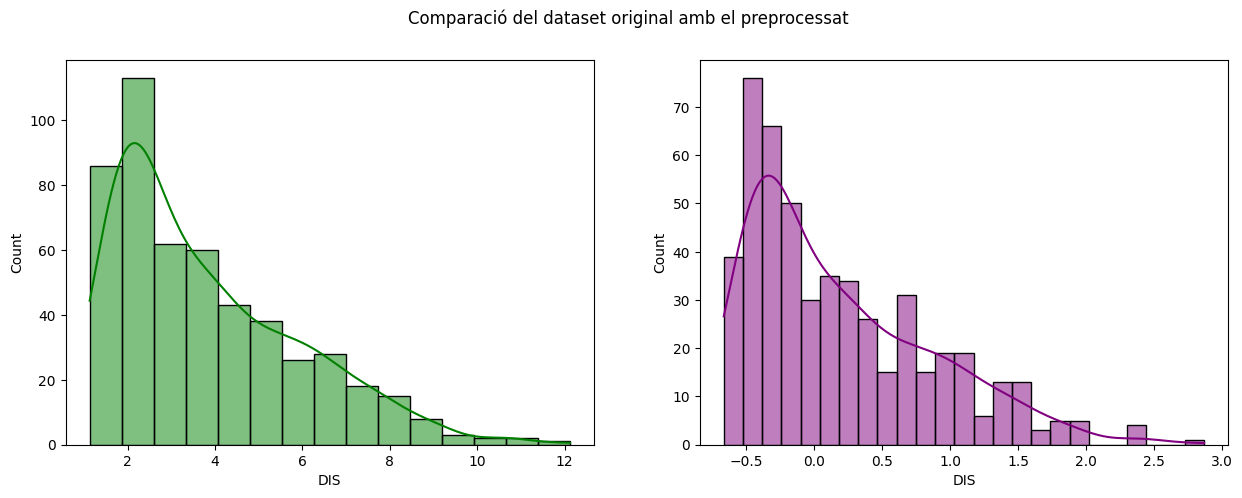

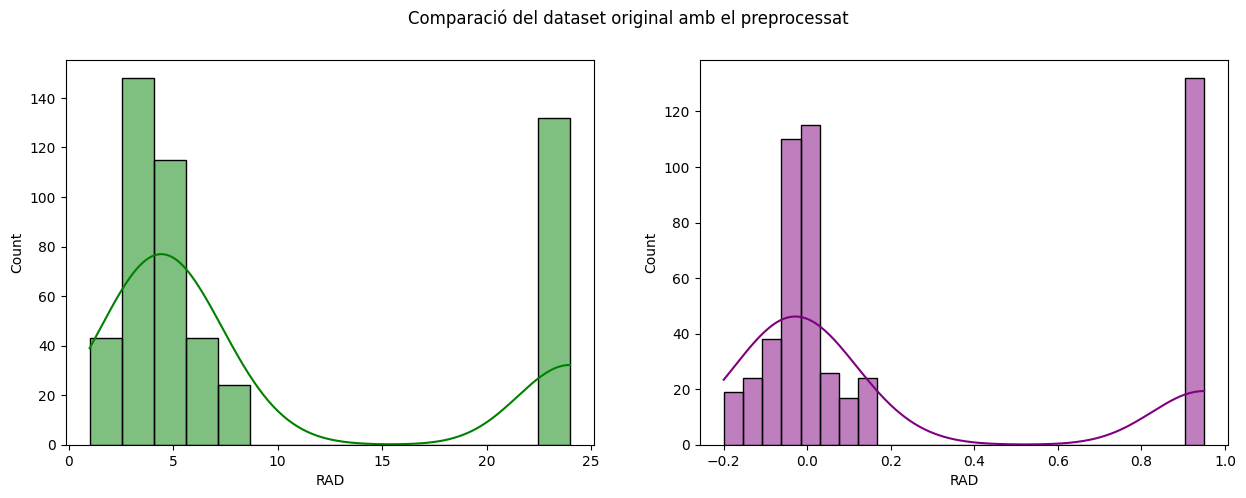

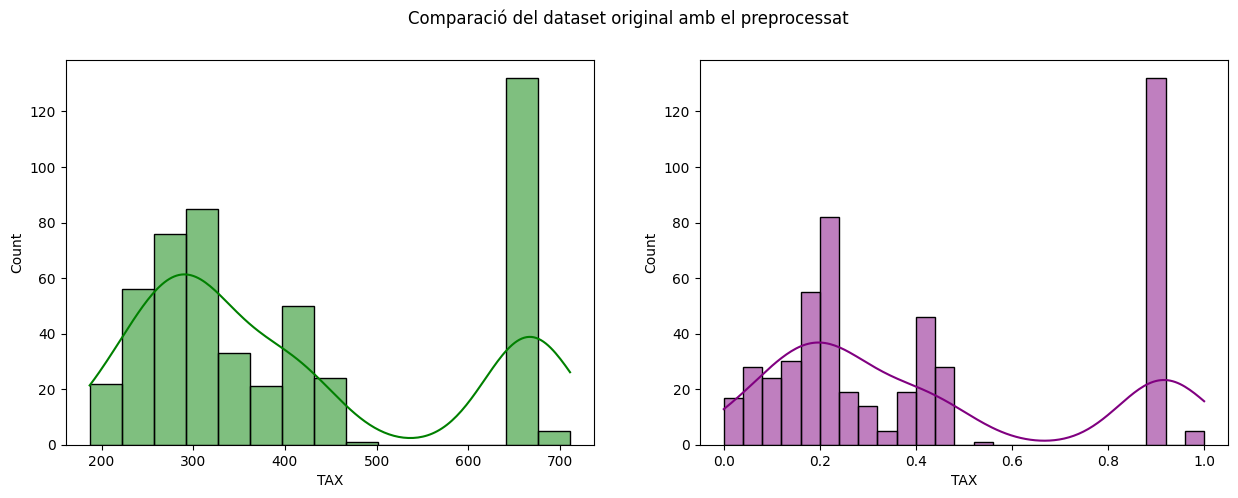

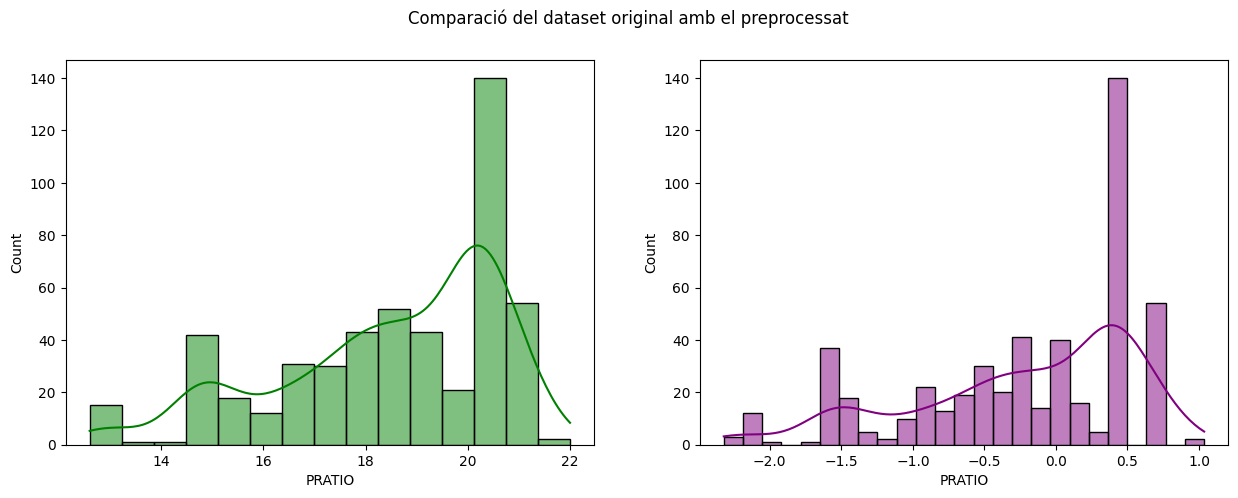

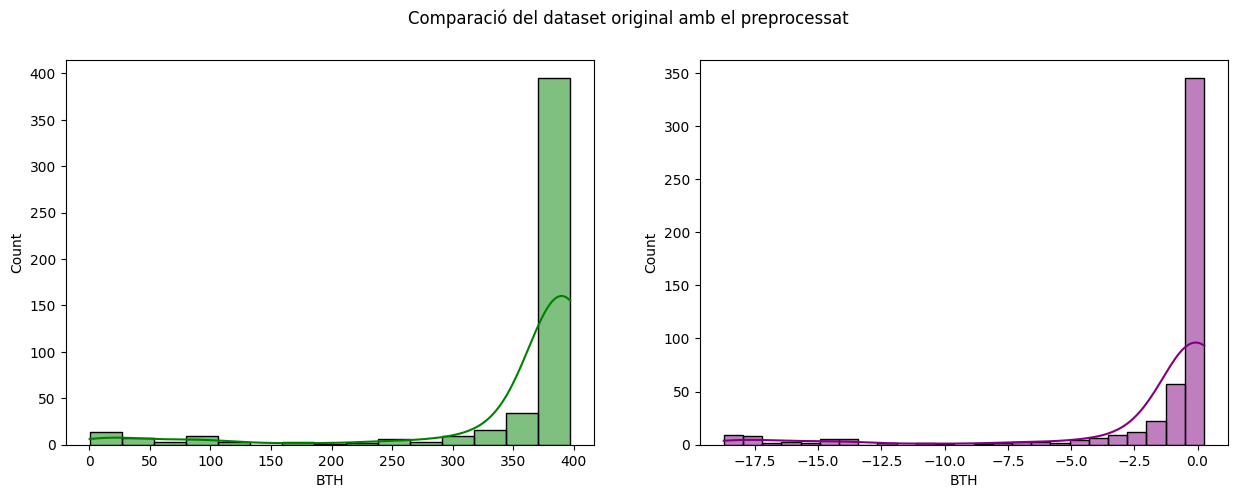

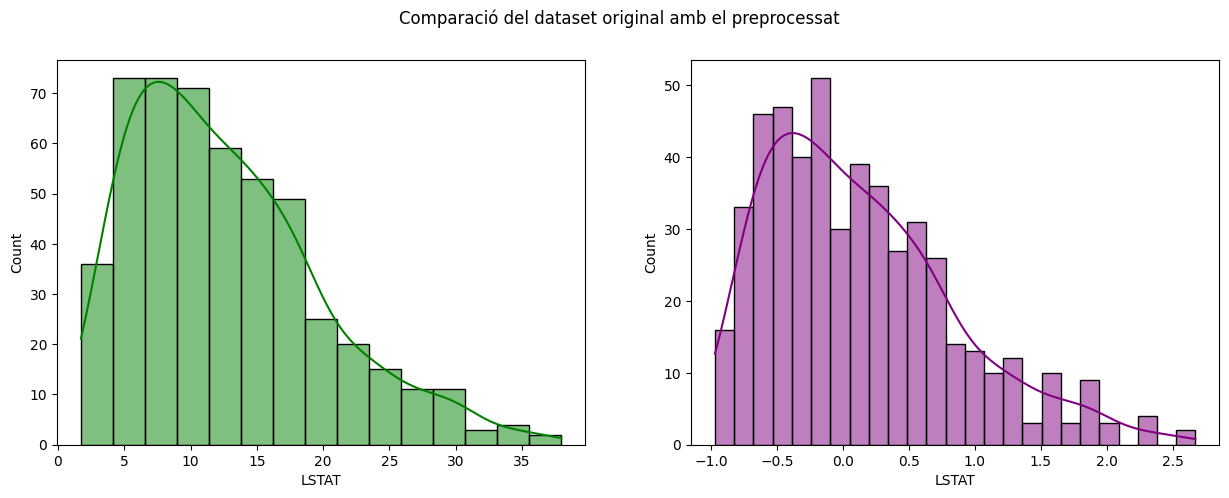

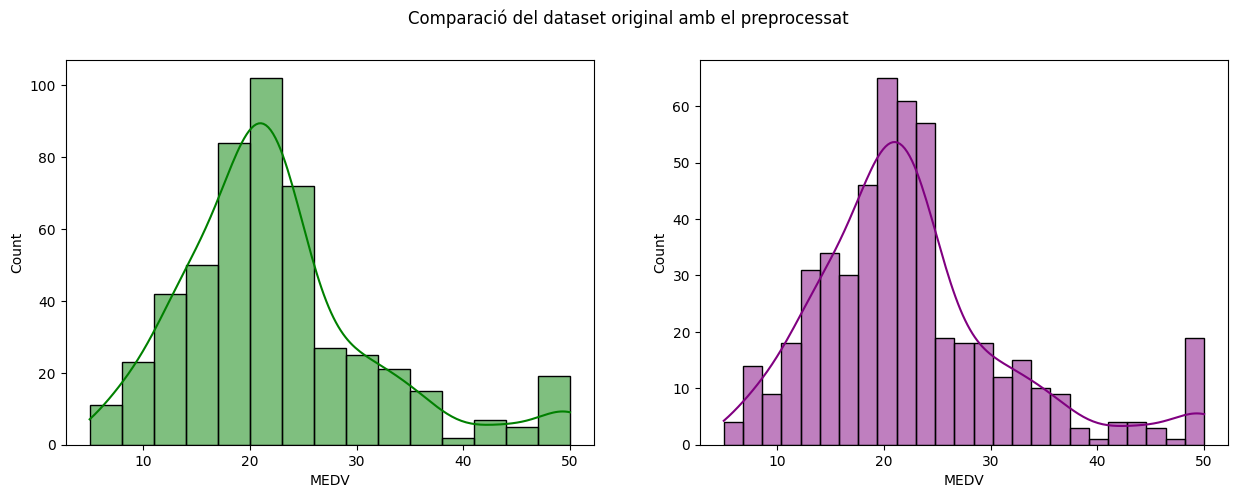

In [79]:
for column in df:
    fig, axes = plt.subplots(1,2, figsize = (15,5))
    fig.suptitle('Comparació del dataset original amb el preprocessat')
    sns.histplot(ax=axes[0], data=df, x=df[column], bins=15, color='green', kde= True)
    sns.histplot(ax=axes[1], data=df_preprocessing, x=df_preprocessing[column], bins=25, color='purple', kde= True);

En la comparativa veiem que totes les columnes s'ha fet l'escalat, normalment entre 0-1 i 0-1, però també entre valors més alts però també escalats. Per tant, es pot deduir que les variables ara són comparables